## Final Project Submission

* Student name: Kamile Yagci
* Student pace: self paced 
* Scheduled project review date/time: 
* Instructor name: Claude Fried
* Blog post URL: 

# SyriaTel Customer Churn Study

## Overview
In this study, I will analyze the 'SyriaTel Customer Churn' data. The SyriaTel is a telecommunication company. The purpose of the study is to predict whether a customer will ("soon") stop doing business with SyriaTel.


## Business Problem
The telecommincation company, SyriaTel, hired me to analyze the Chustomer Churn data. The company wants to understand the customer's decision to discontinue their business with SyriaTel. The results of the analysis will be used make business decisions for improving the company finances. 

This study will

* Search for the predictable pattern for customer decision on stop or continue doing business with SyriaTel
* Choose a model which will best identify the customers who will stop doing business with SyriaTel


## Data

### Load
I use SyriaTel Customer Churn data for this study. The data file is downloaded from Kaggle. 

The file name is 'bigml_59c28831336c6604c800002a.csv'.

In [1]:
# Import base libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import data
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Scrub / Explore

I will first look at the data closely.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

The variable 'phone number' is not useful. Even though, the beginning three numbers are considered area codes, they may be misleading. Nowadays, with the use of cell phones, the area codes do not always reflect the residence/work location of the person. I will remove this variable from dataset.

In [5]:
df = df.drop('phone number', axis=1)

I will convert 'international plan', 'voice mail plan', and 'churn' variables to binary. 

In [6]:
# Convert to binary
df['international plan'] = df['international plan'].map({'yes':1 ,'no':0})
df['voice mail plan'] = df['voice mail plan'].map({'yes':1 ,'no':0})
df['churn'] = df['churn'].map({True:1 ,False:0})
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   int64  
 4   voice mail plan         3333 non-null   int64  
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

Let's see distributions for all varaiables.

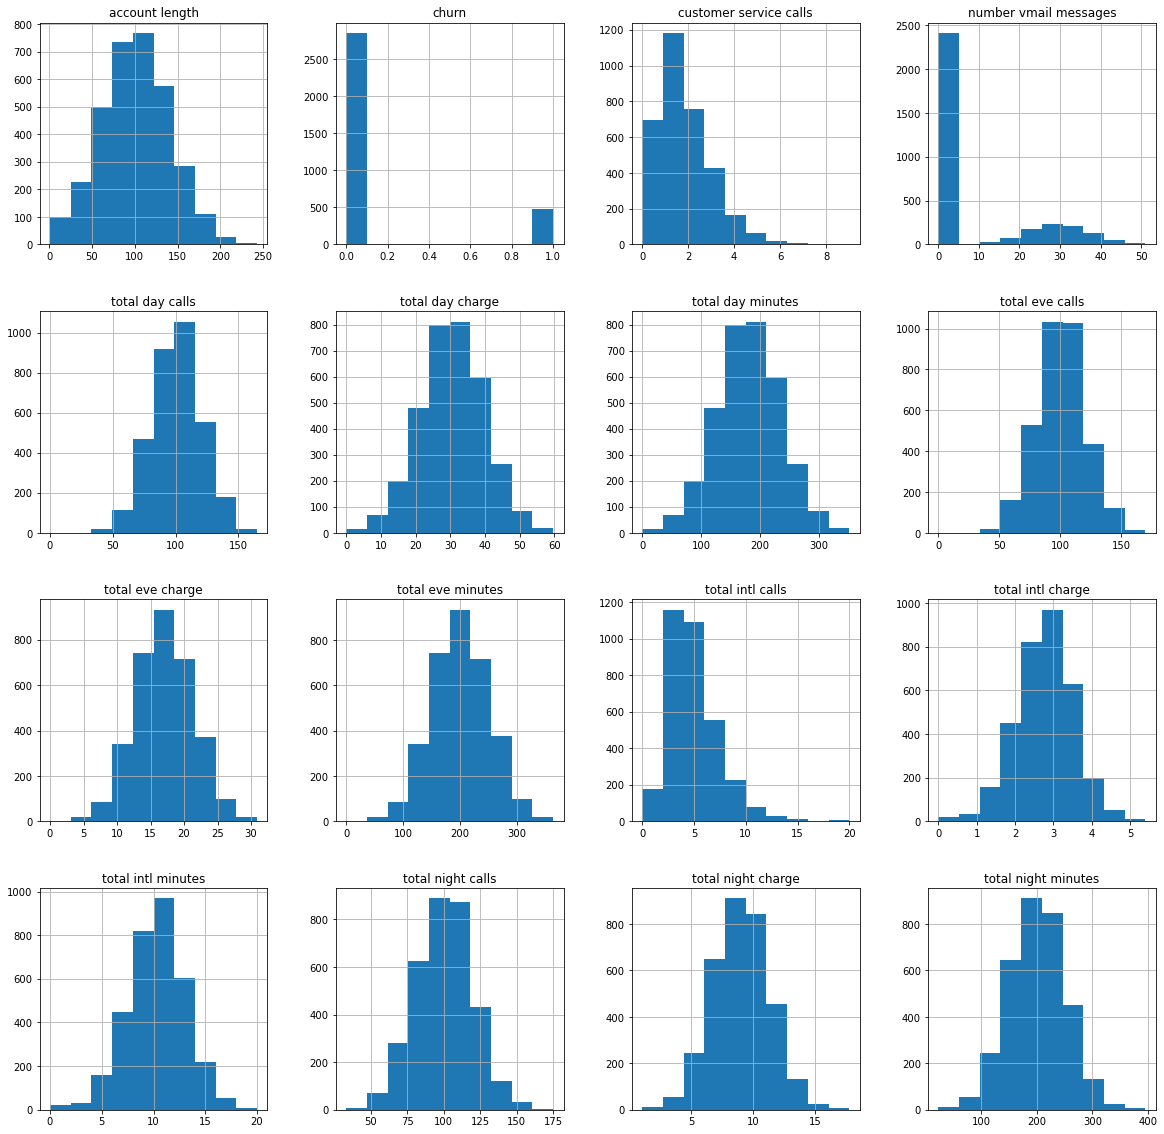

In [268]:
df.hist(figsize=(20,20));
plt.savefig('images/histogram_All.png')

Now, the binary variables have type int64. I will change the dtype to object for these variables, to make them available for dummy variable creation.

The variable 'area code' is also dtype int64, however it is a categorical variable. I will also change it to object.

In [9]:
df = df.astype({'international plan': 'object'})
df = df.astype({'voice mail plan': 'object'})
df = df.astype({'area code': 'object'})

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   object 
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

In [11]:
df.describe()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


The traget variable for this study is 'churn'. Let's check the scatter matrixes.

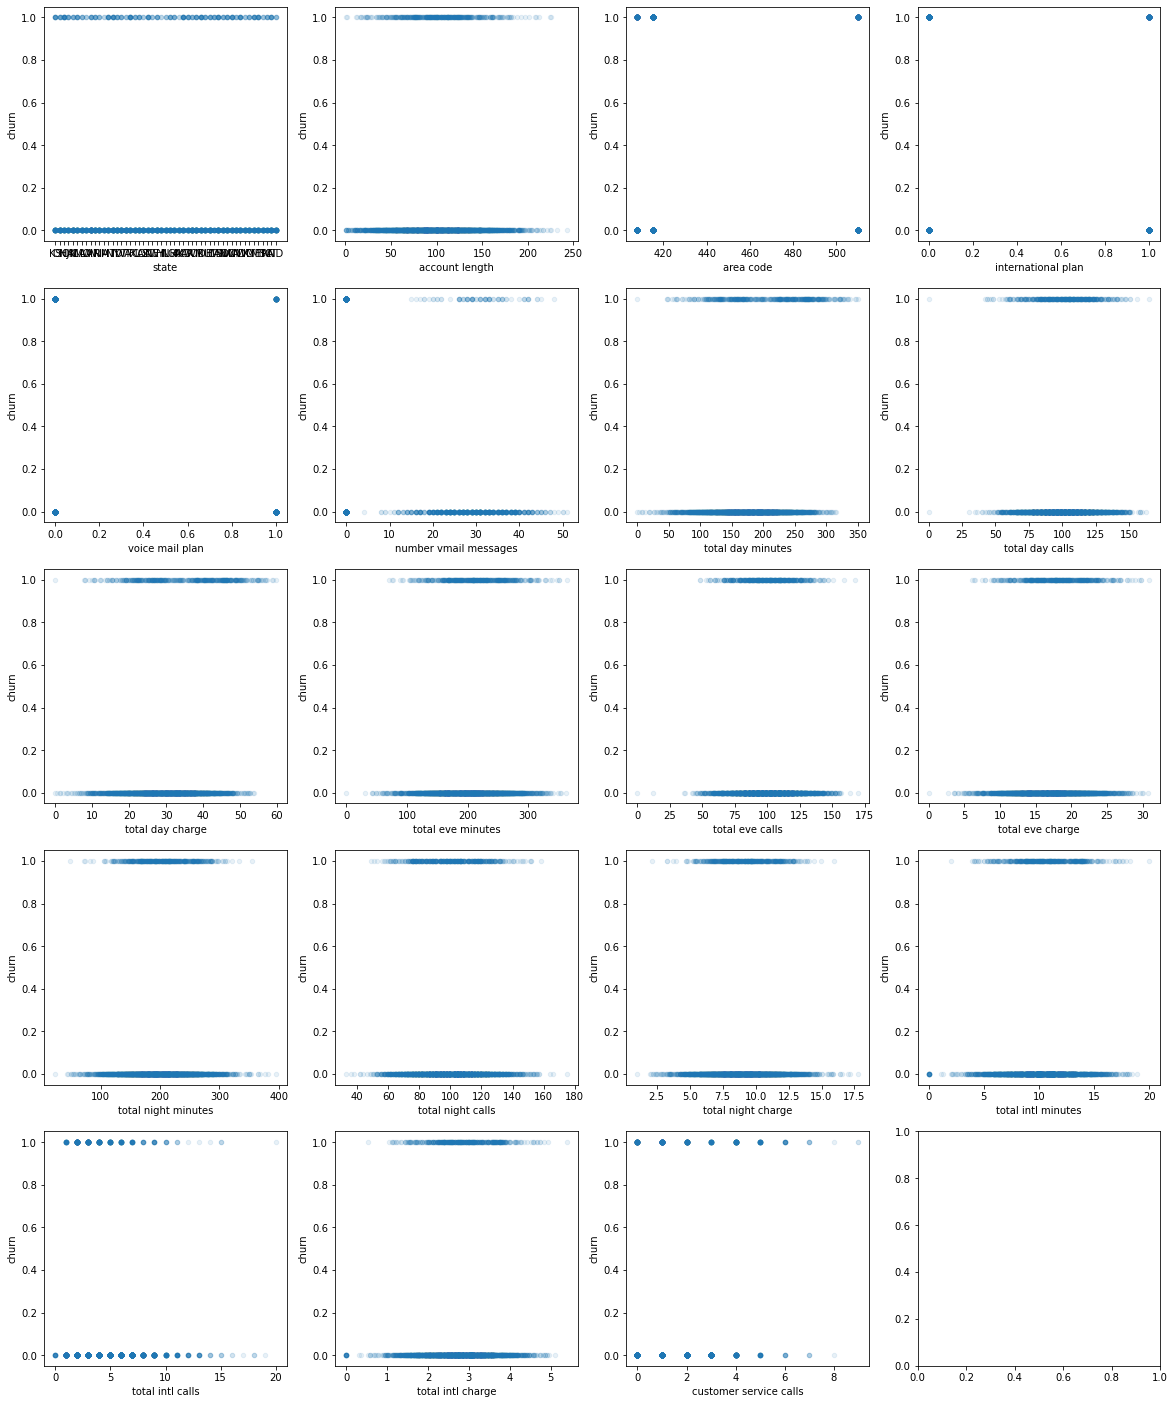

In [248]:
fig, axes = plt.subplots(5, 4, figsize=(20, 25))

for ax, col in zip(axes.flatten(), df.columns[:-1]):
    df.plot.scatter(col, 'churn', alpha=0.1, ax=ax)

plt.savefig('images/scatter_All.png')

It is hard to recognize any patterns for 'churn' in these plots.

We will now look at the models to derive patterns and predictions.

## Model

In this study, we are trying to predict customer's decision on stopping the business with the company. The prediction will be True (1) or False (1). Therefore we will use binary classification model.

The target variable is 'churn': activity of customers leaving the company and discarding the services offered

The rest of the variables in the dataset will be predictors. I will also create dummy variables from categorical varaibels.

Let's create the target data series (y) and predictor dataframe (X).

In [13]:
# Assign target and predictor
y = df['churn']
X = df.drop('churn', axis=1)

X = pd.get_dummies(X)
X.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510,international plan_0,international plan_1,voice mail plan_0,voice mail plan_1
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,1,0,1,0,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,1,0,1,0,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,1,0,1,0,1,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,1,0,0,0,1,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,1,0,0,1,1,0


Next, I will seperate the data into train and test splits. I will allocate 25% of the data for testing. I will also assign a random state for repeatability.

In [14]:
# Sepearate data into train and test splist
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)  # Default test_size=0.25

print('X_train shape = ', X_train.shape)
print('y_train shape = ', y_train.shape)
print('X_test shape = ', X_test.shape)
print('y_test shape = ', y_test.shape)

X_train shape =  (2499, 73)
y_train shape =  (2499,)
X_test shape =  (834, 73)
y_test shape =  (834,)


The data values have different ranges, so I need to normalize/scale each variable in train and test data before modeling .

In [15]:
# Scale/Normalize the predictor variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to Dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_train_scaled.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510,international plan_0,international plan_1,voice mail plan_0,voice mail plan_1
0,-1.404508,-0.584700,-1.883677,1.330852,-1.884170,1.037727,0.401340,1.037905,1.069609,0.004940,...,-0.163417,-0.175899,-0.1555,-0.585514,1.001201,-0.570111,0.327448,-0.327448,0.611418,-0.611418
1,0.366388,-0.584700,0.294083,0.529165,0.293703,0.516178,0.401340,0.517286,2.214376,0.670832,...,-0.163417,-0.175899,-0.1555,-0.585514,1.001201,-0.570111,0.327448,-0.327448,0.611418,-0.611418
2,0.518179,1.685101,1.056392,-1.875896,1.056666,0.093407,0.849774,0.094283,-0.077125,-0.763398,...,-0.163417,-0.175899,-0.1555,1.707902,-0.998800,-0.570111,0.327448,-0.327448,-1.635543,1.635543
3,2.010792,-0.584700,-0.679156,1.681590,-0.679320,-0.402459,0.650470,-0.403094,-0.322994,-0.660953,...,-0.163417,-0.175899,-0.1555,-0.585514,1.001201,-0.570111,0.327448,-0.327448,0.611418,-0.611418
4,0.290493,-0.584700,0.484660,1.080325,0.484172,-0.718549,-0.296224,-0.719184,-1.186487,0.056162,...,-0.163417,-0.175899,-0.1555,-0.585514,-0.998800,1.754044,0.327448,-0.327448,0.611418,-0.611418


### Evaluation Metrics

In the next steps, I will use several classifiers to model the data. I will check their performance using the evaluation metrics:

precision: 
* Number of True Positives / Number of Predicted Positives
* How precise our predictions are?

recall: 
* Nuber of True Positives / Number of Actual Total Positives
* What percentage of the classes we're interested in were actually captured by the model?

accuracy: 
* (Number of True Positives + Number of True Negatives) / (Number of Total Observations)
* Out of all the predictions our model made, what percentage were correct?

f1-score: 
* 2 * (Precision * Recall) / (Precision + Recall)
* Harmonic Mean of Precision and Recall.

*Source: Flatiron Data Science Curriculum, Evaluation Metrics*

Since my business problem is focusing on identfying the customers who stop doing business, I am interested mainly on the 'recall' metrics. However, when optimizing my model, I should also pay attention to the 'precision'. I want my predictions to be true, to be precise. The recall and precision are inversely proportional. Therefore, I choose to  use the f1-score, Harmonic Mean of Precision and Recall, as the main metric for evaluating the performance of the model.

### Logistic Regression

I start with Logistic Regression. I instantiate the model with default parameters and fit on training data. Then I will check the evaluation metrics both for training and testing data.

In [156]:
# Import, Instantiate a LogisticRegression and fit
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

# Predict
#y_train_pred = logreg.predict(X_train_scaled)
#y_test_pred = logreg.predict(X_test_scaled)

LogisticRegression(random_state=42)

In [164]:
#Print out the evaluation metrics for training and testing data
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

print('Training Data:\n', classification_report(y_train, logreg.predict(X_train_scaled)))
print('Testing Data:\n', classification_report(y_test, logreg.predict(X_test_scaled)))

Training Data:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93      2141
           1       0.64      0.27      0.37       358

    accuracy                           0.87      2499
   macro avg       0.76      0.62      0.65      2499
weighted avg       0.85      0.87      0.85      2499

Testing Data:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       709
           1       0.56      0.22      0.32       125

    accuracy                           0.86       834
   macro avg       0.72      0.60      0.62       834
weighted avg       0.83      0.86      0.83       834



My observations from the printed results:

* The metrics look similar for both training and testing data, so no overfitting or underfitting.
* The precision - recall - f1 scores are low (for churn=1), so the model prediction performance is not good. 
* The high accuracy score is misleading. It is caused by the imbalanced dataset.

#### Resampling

Class imbalance effects the performance of the classification model.

In [167]:
print('Original whole data class distribution:')
print(y.value_counts())
print('Original whole data class distribution, normalized:')
print(y.value_counts(normalize=True))

Original whole data class distribution:
0    2850
1     483
Name: churn, dtype: int64
Original whole data class distribution, normalized:
0    0.855086
1    0.144914
Name: churn, dtype: float64


According to the dataset, 85.5% of the customers do continue with SyriaTel and 14.5% of customers stop business.
If we make a prediction that, all customers will continue, then we will have 85.5% accuracy. This explains the high accuracy score of the model, despite the other low metric values.

I will use SMOTE to create a synthetic training sample to take care of imbalance.

In [173]:
# Import SMOTE, resample
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_scaled_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print('Original training data class distribution:')
print(y_train.value_counts())
print('Synthetic training data class distribution:')
print(y_train_resampled.value_counts())

Original training data class distribution:
0    2141
1     358
Name: churn, dtype: int64
Synthetic training data class distribution:
1    2141
0    2141
Name: churn, dtype: int64


In [186]:
# New model after resampling
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled_resampled, y_train_resampled)

print('Training Data:\n', classification_report(y_train, logreg.predict(X_train_scaled)))
print('Testing Data:\n', classification_report(y_test, logreg.predict(X_test_scaled)))

Training Data:
               precision    recall  f1-score   support

           0       0.95      0.78      0.86      2141
           1       0.36      0.75      0.49       358

    accuracy                           0.78      2499
   macro avg       0.66      0.76      0.67      2499
weighted avg       0.86      0.78      0.80      2499

Testing Data:
               precision    recall  f1-score   support

           0       0.95      0.79      0.86       709
           1       0.39      0.78      0.52       125

    accuracy                           0.79       834
   macro avg       0.67      0.78      0.69       834
weighted avg       0.87      0.79      0.81       834



After resampling, the Logistic Regression Model performance is clearly improved.

#### Parameter Tuning

I initially used the default paremeters for the Logistic Regression model. I will now apply parameter tuning with GridSearchCV. It will determine the best parameter combination for the given parameter grid.

In [141]:
print('Default parameters:')
logreg.get_params()

Default parameters:


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [181]:
# Tuning Logistic Regression model with GridSearchCV
from sklearn.model_selection import GridSearchCV

logreg_param_grid = {
    'solver': ['lbfgs', 'liblinear'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1e5, 1e10, 1e15, 1e20],
}

logreg_gs = GridSearchCV(logreg, logreg_param_grid, cv=5, scoring='f1')
#logreg_gs.fit(X_train_scaled, y_train)
logreg_gs.fit(X_train_scaled_resampled, y_train_resampled)

score_logreg_gs = logreg_gs.score(X_test_scaled, y_test)
print('f1-score for test data:', score_logreg_gs)

print("Best Parameter Combination:", logreg_gs.best_params_)

f1-score for test data: 0.5166240409207161
Best Parameter Combination: {'C': 0.001, 'solver': 'liblinear'}


It looks like the parameter tuning, with the given parameter grid, didn't improve the performance much. 

### K Nearest Neighbors

In [229]:
# Import, Instantiate, fit KNeighborsClassifier, 
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
#knn.fit(X_train_scaled, y_train) # #f1 = 0.15 on test data
knn.fit(X_train_scaled_resampled, y_train_resampled) #Resampled data with SMOTE f1 = 0.39 in test data

print('Training Data:\n', classification_report(y_train, knn.predict(X_train_scaled)))
print('Testing Data:\n', classification_report(y_test, knn.predict(X_test_scaled)))

Training Data:
               precision    recall  f1-score   support

           0       1.00      0.82      0.90      2141
           1       0.47      0.99      0.64       358

    accuracy                           0.84      2499
   macro avg       0.74      0.90      0.77      2499
weighted avg       0.92      0.84      0.86      2499

Testing Data:
               precision    recall  f1-score   support

           0       0.92      0.73      0.81       709
           1       0.29      0.62      0.39       125

    accuracy                           0.71       834
   macro avg       0.60      0.67      0.60       834
weighted avg       0.82      0.71      0.75       834



Observations:

* The performance in training data is better than test data. This is a sign of overfitting.
* The fitting on resampled training data has a better performance. The f1-score for test data increased from 0.15 to 0.39. (The results for resampled data is not shown here, but tested).

#### Parameter Tuning

I initially used the default paremeters for the KNN model. I will now apply parameter tuning with GridSearchCV. It will determine the best parameter combination for the given parameter grid.

In [22]:
print('Default parameters:')
knn.get_params()

Default parameters:


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [218]:
# Tuning KNN model with GridSearchCV

knn_param_grid = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15],
    'p': [1, 2, 3, 4]
}

knn_gs = GridSearchCV(knn, knn_param_grid, cv=5, scoring='f1')
knn_gs.fit(X_train_scaled, y_train) 
#knn_gs.fit(X_train_scaled_resampled, y_train_resampled) #Lower performance, f1=0.247

score_knn_gs = knn_gs.score(X_test_scaled, y_test)
print('f1-score for test data:', score_knn_gs)

print("Best Parameter Combination:", knn_gs.best_params_)

f1-score for test data: 0.27751196172248804
Best Parameter Combination: {'n_neighbors': 1, 'p': 4}


Parameter tuning, with the given parameter ranges, didn't improve the KNN model performance.

Why the f1-score decreased after the tuning?

### Decision Tress
I will firstly use DecisionTreeClassifier with default parameters, then apply GridSearchCV to find the optimum parameteres.

In [214]:
# Import, Instantiate, fit DecisionTreeClassifier, 
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
#dt.fit(X_train_scaled_resampled, y_train_resampled)

print('Training Data:\n', classification_report(y_train, dt.predict(X_train_scaled)))
print('Testing Data:\n', classification_report(y_test, dt.predict(X_test_scaled)))

Training Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2141
           1       1.00      1.00      1.00       358

    accuracy                           1.00      2499
   macro avg       1.00      1.00      1.00      2499
weighted avg       1.00      1.00      1.00      2499

Testing Data:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       709
           1       0.75      0.75      0.75       125

    accuracy                           0.93       834
   macro avg       0.85      0.85      0.85       834
weighted avg       0.93      0.93      0.93       834



The KNN model accuracy is better than the random guessing.

#### Parameter Tuning

In [25]:
print('Default parameters:')
dt.get_params()

Default parameters:


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [217]:
# Tuning Decision Trees model with GridSearchCV

dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 3, 4, 5, 6],
    #'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

dt_gs = GridSearchCV(dt, dt_param_grid, cv=5, scoring='f1')
dt_gs.fit(X_train_scaled, y_train)
#dt_gs.fit(X_train_scaled_resampled, y_train_resampled)

score_dt_gs = dt_gs.score(X_test_scaled, y_test)
print('f1-score for test data:', score_dt_gs)

print("Best Parameter Combination:", dt_gs.best_params_)

f1-score for test data: 0.8088888888888889
Best Parameter Combination: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 6}


The parameter tuning significantly improved the Decision Trees performance.

### Random Forests
Let's try an ensemble method Random Forests, which uses DecisionTreeClassifier.

In [224]:
# Import, Instantiate, fit RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
#rf.fit(X_train_scaled_resampled, y_train_resampled) #No change in f1 score

print('Training Data:\n', classification_report(y_train, rf.predict(X_train_scaled)))
print('Testing Data:\n', classification_report(y_test, rf.predict(X_test_scaled)))

Training Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2141
           1       1.00      1.00      1.00       358

    accuracy                           1.00      2499
   macro avg       1.00      1.00      1.00      2499
weighted avg       1.00      1.00      1.00      2499

Testing Data:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       709
           1       0.98      0.63      0.77       125

    accuracy                           0.94       834
   macro avg       0.96      0.81      0.87       834
weighted avg       0.94      0.94      0.94       834



#### Parameter Tuning

In [225]:
print('Default parameters:')
rf.get_params()

Default parameters:


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [230]:
# Tuning Random Forest model with GridSearchCV

rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 3, 4, 5, 6],
    #'min_samples_leaf': [3, 6],
    'max_features': [4, 5, 6, 7, 8]
}

rf_gs = GridSearchCV(rf, rf_param_grid, cv=5, scoring='f1')
rf_gs.fit(X_train_scaled, y_train)

score_rf_gs = rf_gs.score(X_test_scaled, y_test)
print('f1-score on test data:', score_rf_gs)

print("Best Parameter Combination:", rf_gs.best_params_)

f1-score on test data: 0.7326732673267325
Best Parameter Combination: {'criterion': 'gini', 'max_depth': None, 'max_features': 8, 'min_samples_split': 3, 'n_estimators': 100}


The paremeter tuning didn't improve the performance of Random Forest model.

### XGBoost

In [234]:
# Import, Instantiate, fit XGBClassifier
from xgboost import XGBClassifier
import xgboost as xgb

xgb = XGBClassifier(random_state=42, eval_metric='logloss') #'logloss' is default, but specified to stop warning
xgb.fit(X_train_scaled, y_train)
#xgb.fit(X_train_scaled_resampled, y_train_resampled)

print('Training Data:\n', classification_report(y_train, xgb.predict(X_train_scaled)))
print('Testing Data:\n', classification_report(y_test, xgb.predict(X_test_scaled)))

Training Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2141
           1       1.00      1.00      1.00       358

    accuracy                           1.00      2499
   macro avg       1.00      1.00      1.00      2499
weighted avg       1.00      1.00      1.00      2499

Testing Data:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       709
           1       0.94      0.74      0.83       125

    accuracy                           0.95       834
   macro avg       0.95      0.86      0.90       834
weighted avg       0.95      0.95      0.95       834



#### Parameter Tuning

In [235]:
print('Default parameters:')
xgb.get_params()

Default parameters:


{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 4,
 'num_parallel_tree': 1,
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'eval_metric': 'logloss'}

In [236]:
# Tuning XGBClassifier with GridSearchCV
from sklearn.model_selection import GridSearchCV

xgb_param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [None, 2, 4, 6, 8, 10],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [30, 100],
}

xgb_gs = GridSearchCV(xgb, xgb_param_grid, cv=5, scoring='f1')
xgb_gs.fit(X_train_scaled, y_train)

score_xgb_gs = xgb_gs.score(X_test_scaled, y_test)
print('f1-score on test data:', score_xgb_gs)

print("Best Parameter Combination:", xgb_gs.best_params_)

f1-score on test data: 0.8288288288288288
Best Parameter Combination: {'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.7}


The parameter tuning didn't effect the XGBoost performance much. 

### Compare the models

At this section, I will compare the classification models to choose the best one to identify the customers who will study doing business with SyriaTel . 

I will now look evaluation metrics like precision, recall, accuracy and f1. 

I will also plot ROC curves and calculate AUC for each model.

* ROC: Receiver Operating Characteristic curve illustrates the true positive rate against the false positive rate.
* AUC: Area Under Curve

I will use the optimal/best parameter set selected by the GridSearchCV to instantiate my models.

-----------
**Optimal parameter set when 'accuracy' score is used for tuning.**

**!NOT USED for model comparison!** 

Logictic Regression: {'C': 0.01, 'solver': 'lbfgs'}

KNN: {'n_neighbors': 5, 'p': 2}

Decision Trees: {'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 5}

Random Forest: {'criterion': 'gini', 'max_depth': None, 'max_features': 8, 'min_samples_split': 3, 'n_estimators': 100}

XGBoost: {'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.7}

----------------

-----------
**Optimum parameter sets when f1-score is used for tuning** 

Logictic Regression: {'C': 0.001, 'solver': 'liblinear'}  (with resampled data)

KNN: Default  (with resampled data)

Decision Trees: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 6}

Random Forest: {'criterion': 'gini', 'max_depth': None, 'max_features': 8, 'min_samples_split': 3, 'n_estimators': 100}

XGBoost: {'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.7}

----------------

In [237]:
# InInstantiate models with optimum parameters
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

logreg_best = LogisticRegression(C=0.001, solver='liblinear', random_state=42)  # use resampled training data
knn_best = KNeighborsClassifier() # use resampled training data
dt_best = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_split=6)
rf_best = RandomForestClassifier(criterion='gini', max_depth=None, max_features=8, min_samples_split=3, \
                                 n_estimators=100, random_state=42)
xgb_best = XGBClassifier(learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, \
                         subsample=0.7, random_state=42, eval_metric='logloss')

model_list = [logreg_best, knn_best, dt_best, rf_best, xgb_best]
model_names = ['Logistic Regression', 'K-Nearest Neighbor', 'Decision Trees', 'Random Forest', 'XGBoost']

In [238]:
# Import scoring and ROC libraries
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score


In [245]:

def model_scores(dataset_type, X_scaled, y_true):
    """
    dataset_type = 'Testing' or 'Training' 
    X_scaled = X_test_scaled or X_train_scaled
    y_true = y_train or y_test
    
    """
    colors = sns.color_palette('Set2')
    plt.figure(figsize=(10, 8))

    model_scores_list = []

    for n, clf in enumerate(model_list):
        #print(n)
        
        if n==0 or n==1:
            clf.fit(X_train_scaled_resampled, y_train_resampled)
        else:
            clf.fit(X_train_scaled, y_train)
    
        y_pred = clf.predict(X_scaled)
        
        #y_score = clf.decision_function(X_scaled)
        y_prob = clf.predict_proba(X_scaled) #Probability estimates for each class
        fpr, tpr, thresholds = roc_curve(y_true, y_prob[:,1])
        auc_score = auc(fpr, tpr)
        plt.plot(fpr, tpr, color=colors[n], lw=2, label=f'{names[n]}, AUC={round(auc_score, 4)} ')
        
        fit_scores = {'model': model_names[n],
                        'precision': precision_score(y_true, y_pred),
                        'recall': recall_score(y_true, y_pred),
                        'accuracy': accuracy_score(y_true, y_pred),
                        'f1': f1_score(y_true, y_pred),
                        'auc': auc_score
                       }
    
        model_scores_list.append(fit_scores)
    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title(f'ROC Curve for {dataset_type} Data', fontsize=14)
    plt.legend(loc='lower right', fontsize=12)
    #plt.show()
    plt.savefig(f'images/ROC_Curve_{dataset_type}.png')
        

    model_scores_df = pd.DataFrame(model_scores_list)
    model_scores_df = model_scores_df.set_index('model')
    #print(model_scores_df)
        
    return model_scores_df

,precision,recall,accuracy,f1,auc
model,,,,,
Logistic Regression,0.330189,0.840,0.720624,0.474041,0.830511
K-Nearest Neighbor,0.286245,0.616,0.712230,0.390863,0.693106
Decision Trees,0.873786,0.720,0.942446,0.789474,0.884897
Random Forest,0.961039,0.592,0.935252,0.732673,0.930482
XGBoost,0.948454,0.736,0.954436,0.828829,0.934409


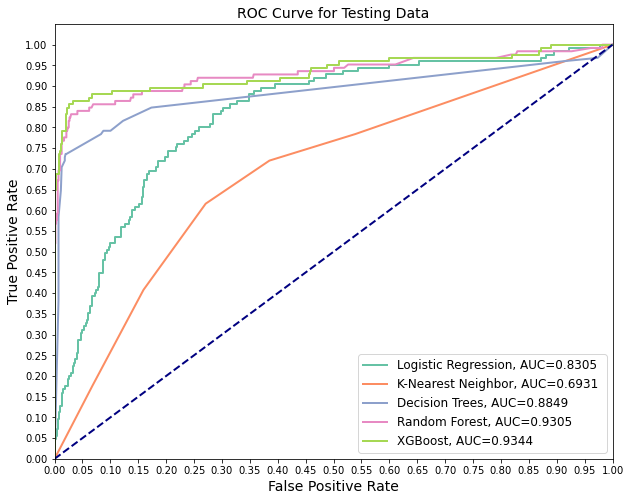

In [246]:
model_scores('Testing', X_test_scaled, y_test)

,precision,recall,accuracy,f1,auc
model,,,,,
Logistic Regression,0.314378,0.818436,0.718287,0.454264,0.831022
K-Nearest Neighbor,0.474035,0.994413,0.841136,0.642020,0.991698
Decision Trees,0.971429,0.759777,0.962385,0.852665,0.928302
Random Forest,1.000000,0.986034,0.997999,0.992968,1.000000
XGBoost,1.000000,0.994413,0.999200,0.997199,1.000000


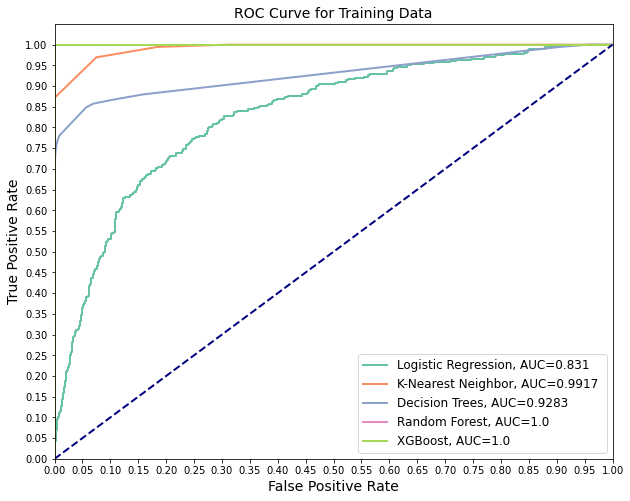

In [247]:
model_scores('Training', X_train_scaled, y_train)

## Interpret

Let's interpret our results in the light of our business questions:
* Search for the predictable pattern for customer decision on stop or continue doing business with SyriaTel
* Choose a model which will best identify the customers who will stop doing business with SyriaTel

All of my models showed some pattern for customer decision on stop or continue doing business. They also did predictions to identify the customers who will discontinue service (churn customers).  

Which model is best on identinfying churn customers?

I use the test data evaluation results to do final model comparisons.

Here are my observations based on evaluation metrics and AUC:
* Overall performance: Decision Trees, Random Forest and XGBoost are top three.
* f1-score: Decision Trees, Random Forest and XGBoost are best
* recall: Decision Trees and XGBoost have better scores
* precision: Random Forest and XGBoost are best
* accuracy: Decision Trees, Random Forest and XGBoost are top three
* AUC: Random Forest and XGBoost have better value

The results showed that XGBoost classifier has the best performance in all aspects. It also has the best recall and f1 score, which matters most for my study. 

I choose the XGBoost model as my final model. 

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       709
           1       0.95      0.74      0.83       125

    accuracy                           0.95       834
   macro avg       0.95      0.86      0.90       834
weighted avg       0.95      0.95      0.95       834



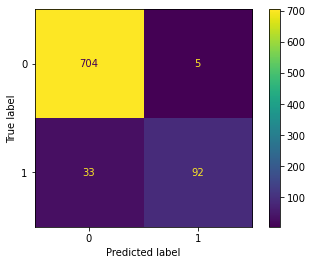

In [265]:
xgb_best.fit(X_train_scaled, y_train)

print(classification_report(y_test, xgb_best.predict(X_test_scaled)))

plot_confusion_matrix(xgb_best, X_test_scaled, y_test)
plt.savefig('images/confusion_matrix_XGB.png')

The summary of XGBoost Classifier Model performance:
* It successfully indentifies the 74% of the true churn customers. (recall)
* Among the model predicted churn customers, 95% of them are true churn customers. (precision)
* The Harmonic Mean of Precision and Recall (f1-score) is 83%.


The identification numbers on test data:
* Identification numbers:
    ** Number of true positives: 92
    ** Number of true negatives: 704
    ** Number of false positives: 5
    ** Number of false negatives: 33
* It identifies 92 out of 125 churn customers correctly.
* 92 out of 97 predicted  churn customers are real churn.